## Predictions of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
# load all functions
from C01_visualization import *
from C02_model_predictions import *
from C03_model_evaluate import *

In [2]:
# lib manipulation data
import numpy as np
import pandas as pd

# lib data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# lib data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

- config models

In [3]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Collections

In [4]:
# load dataset
dataset = pd.read_csv("../dataset/Cryptocurrency-BTC-USD-2024-04.csv", parse_dates=['Date'])
dataset = dataset[["Date", "Open", "High", "Low", "Close"]]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3408 non-null   datetime64[ns]
 1   Open    3408 non-null   float64       
 2   High    3408 non-null   float64       
 3   Low     3408 non-null   float64       
 4   Close   3408 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 133.3 KB


In [5]:
# show dataset
print(dataset.tail())

           Date          Open          High           Low         Close
3403 2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
3404 2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
3405 2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
3406 2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
3407 2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469


### 2. Exploration Data Analysis

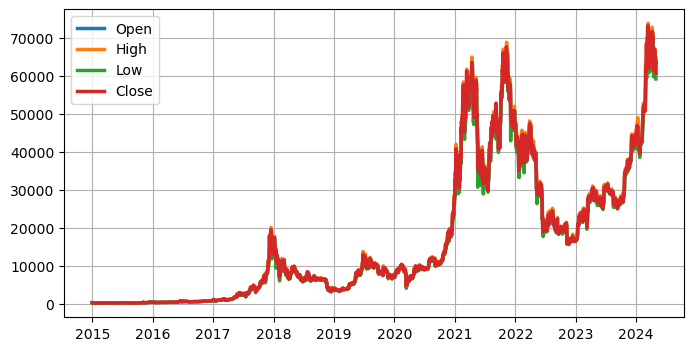

In [6]:
timeseries_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

In [7]:
# 1. process feature selection
data = dataset.filter(['Close'])
data = data.values

In [8]:
# 1. results feature selection
np.round(data[:5],6)

array([[314.248993],
       [315.032013],
       [281.082001],
       [264.195007],
       [274.473999]])

In [9]:
# 2. process normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(data).reshape(-1,1))

In [10]:
# 2. results normalize features
np.round(scaled[:5],6)

array([[0.001867],
       [0.001878],
       [0.001413],
       [0.001181],
       [0.001322]])

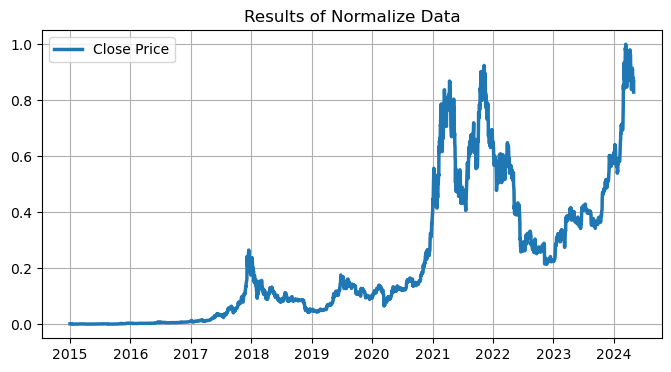

In [11]:
# 2. results normalize features
lineplot_matplotlib1(
  x1=dataset["Date"], y1=scaled, label1="Close Price",
  title="Results of Normalize Data"
)

In [12]:
# 3. process inverse normalize features
def inverse(scaler, scaled):
  hasil = scaler.inverse_transform(scaled.reshape(-1,1))
  return hasil

In [13]:
# 4. process splitting data
train_data, test_data = train_test_split(scaled, train_size=0.80, test_size=0.20, shuffle=False)

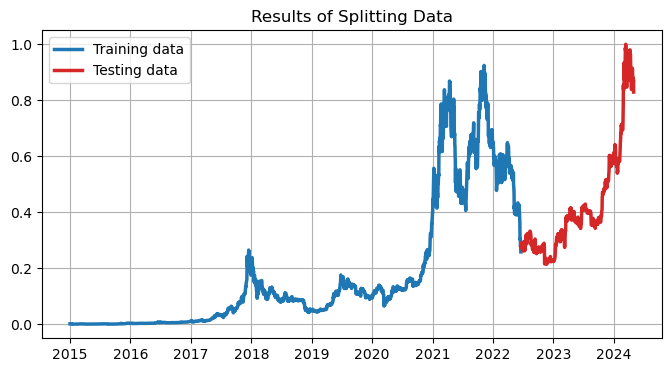

In [14]:
# 4. results splitting data
lineplot_matplotlib2(
  x1=dataset.iloc[0:len(train_data),0], y1=train_data, label1="Training data",
  x2=dataset.iloc[len(train_data):len(dataset),0], y2=test_data, label2="Testing data",
  title="Results of Splitting Data"
)

### 4. Supervised Learning

In [15]:
# function for supervised learning
def create_dataset(look_back, dataset):
    
  # declare variable X and Y
  dataX = []
  dataY = []
  
  # for loop for create supervised learning
  for i in range(look_back, len(dataset)):
    dataX.append(dataset[i-look_back:i, 0])
    dataY.append(dataset[i, 0])
      
  # return value X and Y
  return np.array(dataX), np.array(dataY)
# ----------------------------------------------------------------------------------------

In [16]:
# process supervised learning
x_train, y_train = create_dataset(60, train_data)
x_test, y_test = create_dataset(60, test_data)

In [17]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(2666, 60, 1)


In [18]:
# reshape input to be [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(622, 60, 1)


### 5. Algorithms SBi-LSTM-RNN

In [19]:
# config algorithms
algorithms="SBi-LSTM-RNN"

In [20]:
# process predict with LSTM
lstm_model = get_models(algorithms=algorithms, timestep=x_train.shape[1])

In [21]:
# process predict with LSTM
lstm_history, lstm_predictions = get_predictions(
  model=lstm_model,
  x_train=x_train, y_train=y_train,
  x_test=x_test, y_test=y_test,
)

Epoch 1/50
167/167 [==============================] - 18s 45ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 2/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 3/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
167/167 [==============================] - 5s 30ms/step - loss: 9.5944e-04 - val_loss: 8.7951e-04
Epoch 10/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0012

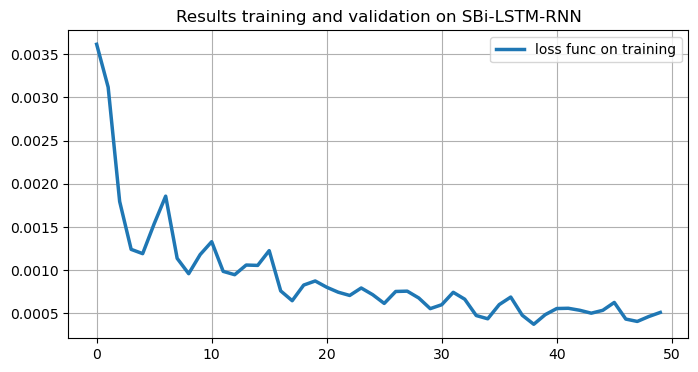

In [22]:
# results training and validation 
lineplot_matplotlib1(
  x1=lstm_history.epoch, y1=lstm_history.history["loss"], label1="loss func on training",
  title="Results training and validation on "+algorithms
)

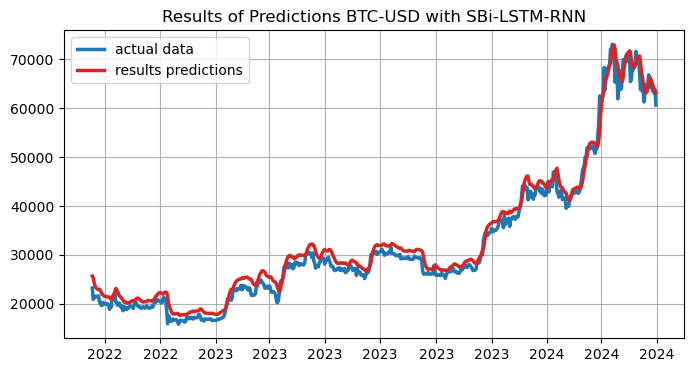

In [23]:
# results predict with LSTM
lineplot_matplotlib3(
  x1=dataset["Date"].iloc[len(y_train)+120:].values, y1=inverse(scaler, y_test), label1="actual data",
  x2=dataset["Date"].iloc[len(y_train)+120:].values, y2=inverse(scaler, lstm_predictions), label2="results predictions",
  title="Results of Predictions BTC-USD with "+algorithms
)

In [24]:
# calculate eror
lstm_r, lstm_p, lstm_mae, lstm_rmse, lstm_mape = evaluate_models(inverse(scaler, y_test), inverse(scaler, lstm_predictions))

# show eror
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("R       : "+str(lstm_r))
print("P-value : "+str(lstm_p))
print("MAE     : "+str(lstm_mae))
print("RMSE    : "+str(lstm_rmse))
print("MAPE    : "+str(lstm_mape))

Evaluate Models with : SBi-LSTM-RNN
-------------------------------
R       : 0.9963
P-value : 0.0
MAE     : 1537.3402
RMSE    : 1793.3144
MAPE    : 0.0556


### 6. Algorithms SBi-GRU-RNN

In [25]:
# config algorithms
algorithms="SBi-GRU-RNN"

In [26]:
# process predict with GRU
gru_model = get_models(algorithms=algorithms, timestep=x_train.shape[1])

In [27]:
# process predict with GRU
gru_history, gru_predictions = get_predictions(
  model=gru_model,
  x_train=x_train, y_train=y_train,
  x_test=x_test, y_test=y_test,
)

Epoch 1/50
167/167 [==============================] - 17s 40ms/step - loss: 0.0041 - val_loss: 0.0057
Epoch 2/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 3/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0010 - val_loss: 7.4372e-04
Epoch 5/50
167/167 [==============================] - 5s 32ms/step - loss: 6.8837e-04 - val_loss: 5.2372e-04
Epoch 6/50
167/167 [==============================] - 5s 31ms/step - loss: 7.4532e-04 - val_loss: 6.8915e-04
Epoch 7/50
167/167 [==============================] - 5s 31ms/step - loss: 6.5412e-04 - val_loss: 5.7700e-04
Epoch 8/50
167/167 [==============================] - 5s 31ms/step - loss: 9.0758e-04 - val_loss: 7.6119e-04
Epoch 9/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 10/50
167/167 [==============================] -

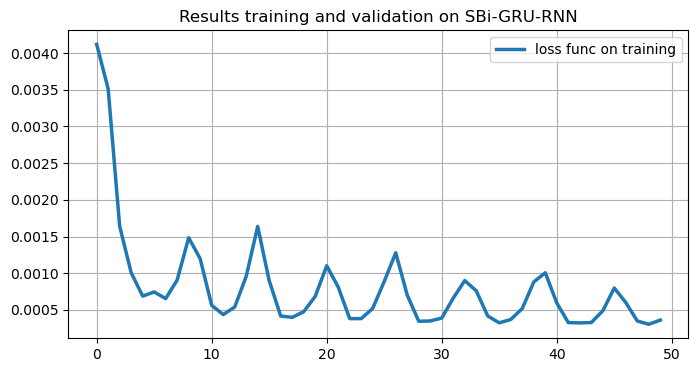

In [28]:
# results training and validation 
lineplot_matplotlib1(
  x1=gru_history.epoch, y1=gru_history.history["loss"], label1="loss func on training",
  title="Results training and validation on "+algorithms
)

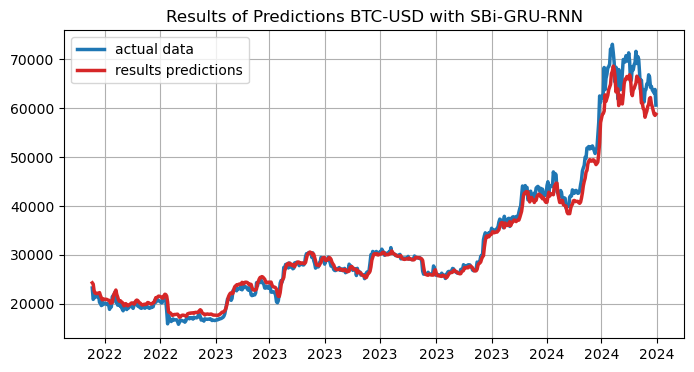

In [29]:
# results predict with GRU
lineplot_matplotlib3(
  x1=dataset["Date"].iloc[len(y_train)+120:].values, y1=inverse(scaler, y_test), label1="actual data",
  x2=dataset["Date"].iloc[len(y_train)+120:].values, y2=inverse(scaler, gru_predictions), label2="results predictions",
  title="Results of Predictions BTC-USD with "+algorithms
)


In [30]:
# calculate eror
gru_r, gru_p, gru_mae, gru_rmse, gru_mape = evaluate_models(inverse(scaler, y_test), inverse(scaler, gru_predictions))

# show eror
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("R       : "+str(gru_r))
print("P-value : "+str(gru_p))
print("MAE     : "+str(gru_mae))
print("RMSE    : "+str(gru_rmse))
print("MAPE    : "+str(gru_mape))

Evaluate Models with : SBi-GRU-RNN
-------------------------------
R       : 0.9972
P-value : 0.0
MAE     : 1253.7667
RMSE    : 1883.3505
MAPE    : 0.0369
